<center><u><h1>Assignment 6-: Recurrent Neural Network_RNN</center></u></h1>

![](https://media2.giphy.com/media/kMM3vtBEgSsLu/200.gif?cid=5a38a5a27vcd94pnliw27edw63pf5vie9zid29sb03ksfrda&rid=200.gif)

Recurrent Neural Network (RNN):<br>
A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes form a directed or undirected graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior. Derived from feedforward neural networks, RNNs can use their internal state (memory) to process variable length sequences of inputs.This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition.
![](https://www.simplilearn.com/ice9/free_resources_article_thumb/Simple_Recurrent_Neural_Network.png)

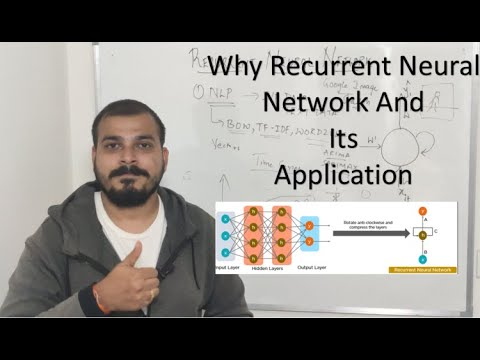

In [ ]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('CPl9XdIFbYA', width=600, height=300)

The nodes in different layers of the neural network are compressed to form a single layer of recurrent neural networks. A, B, and C are the parameters of the network.

![](https://www.simplilearn.com/ice9/free_resources_article_thumb/Network_framework.gif)

Here, “x” is the input layer, “h” is the hidden layer, and “y” is the output layer. A, B, and C are the network parameters used to improve the output of the model. At any given time t, the current input is a combination of input at x(t) and x(t-1). The output at any given time is fetched back to the network to improve on the output.
![](https://www.simplilearn.com/ice9/free_resources_article_thumb/Fully_connected_Recurrent_Neural_Network1.png)

Why Recurrent Neural Networks?<br>
RNN were created because there were a few issues in the feed-forward neural network:
1. Cannot handle sequential data
2. Considers only the current input
3. Cannot memorize previous inputs

An RNN can handle sequential data, accepting the current input data, and previously received inputs. RNNs can memorize previous inputs due to their internal memory.

How Does Recurrent Neural Networks Work?
![](https://www.simplilearn.com/ice9/free_resources_article_thumb/Fully_connected_Recurrent_Neural_Network.gif)

The input layer ‘x’ takes in the input to the neural network and processes it and passes it onto the middle layer.<br>
The Recurrent Neural Network will standardize the different activation functions and weights and biases so that each hidden layer has the same parameters. Then, instead of creating multiple hidden layers, it will create one and loop over it as many times as required.

You read more about RNN here:<br>
https://www.tensorflow.org/guide/keras/rnn

Applications of Recurrent Neural Networks
1. Prediction problems.
2. Language Modelling and Generating Text.
3. Machine Translation.
4. Speech Recognition.
5. Generating Image Descriptions.
6. Video Tagging.
7. Text Summarization.

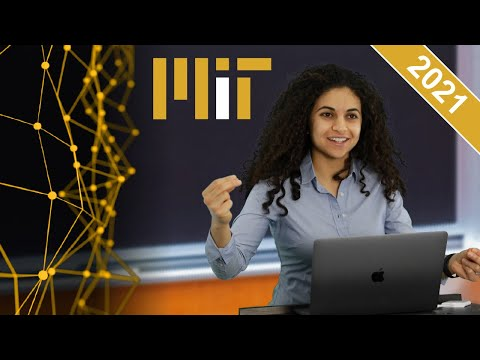

In [ ]:
###Refer Video
YouTubeVideo('qjrad0V0uJE', width=600, height=300)

Types of Recurrent Neural Networks
1. One to One<br>
This type of neural network is known as the Vanilla Neural Network. It's used for general machine learning problems, which has a single input and a single output.

2. One to Many<br>
This type of neural network has a single input and multiple outputs. An example of this is the image caption.<br>
3. Many to One<br>
This RNN takes a sequence of inputs and generates a single output. Sentiment analysis is a good example of this kind of network where a given sentence can be classified as expressing positive or negative sentiments.<br>
4. Many to Many<br>
This RNN takes a sequence of inputs and generates a sequence of outputs. Machine translation is one of the examples.<br>
![](https://srdas.github.io/DLBook/DL_images/rnn2.png)

<h2><u>RNN for MNIST digits classification</h2></u>
<br>
Let's now do some coding. We will be solving a problem which is classification of MNIST digits. The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The MNIST database contains 60,000 training images and 10,000 testing images. The goal of this project is to create a model that will be able to recognize and determine the handwritten digits from its image.

![mnist](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png)

<br>
Let's begin by importing the required libraries.
<br>


1.   Numpy: to perform array and matrix operations
2.   Sequential: The core idea of Sequential API is simply arranging the Keras layers in a sequential order.
3.   Dense layer: In any neural network, a dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer.
4.   Activation layer: An activation function in a neural network defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network.
5.   SimpleRNN layer: Fully-connected RNN where the output is to be fed back to input.
6.   to_categorical: converts a vector which has integers that represent different categories, into a numpy array (or) a matrix which has binary values and has columns equal to the number of categories in the data.
7.   plot_model: used to plot a trained model.
8.   mnist: will load the mnist dataset which is already available in tensorflow.


In [1]:
# import the above mentioned libraries
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,SimpleRNN
from tensorflow.keras.utils import to_categorical,plot_model
from tensorflow.keras.datasets import mnist

Now, we will load the data using the load_data method in the variables (x_train, y_train), (x_test, y_test).

In [2]:
  # load mnist dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Now we will find out the number of labels in the dataset i.e how many prediction classes are present. For that, we apply the len() function by passing in it unique values using np.unique function from y_train(which contains the predictions of training dataset).

In [3]:
# compute the number of labels
num_labels=len(np.unique(y_train))

Next we will convert the prediction datasets into matrices having binary values. We will use to_categorical function that converts a vector which has integers that represent different categories, into a numpy array (or) a matrix which has binary values and has columns equal to the number of categories in the data.

![to_categorical.png](https://miro.medium.com/max/1400/1*yJ8em7E3SdRjrOdi82E_3Q.png)

In [4]:
# convert the prediction data
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

Here we are going to store image into a image_size variable and normalizes the supplied array and reshapes it into the appropriate format.<br>
After converting we will normalize all the images for further training.
We will normalize all values between 0 and 1 and we will flatten the images into vectors.
Normalization of images is very important step for getting proper output because if we not normalize the image it can affect the accuracy of our model. So normalization is a neccessary step for better accuracy.

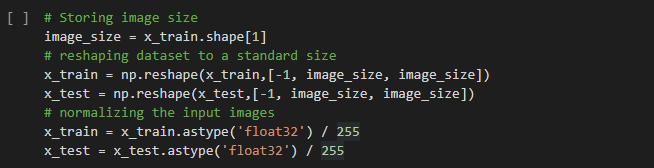

Copy the above code into below cell.

In [5]:
image_size=x_train.shape[1]
x_train=np.reshape(x_train,[-1,image_size,image_size])
x_test=np.reshape(x_test,[-1,image_size,image_size])
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

Now we set some of the parameter values which will be passed while training. <br>

1.   input_shape: specifies the shape of the input, set to same as the image size
2.   batch_size: The batch size defines the number of samples that will be propagated through the network. Here it is set to 128.
3.   units: defines the size of the output from the dense layer. Here it is set to 256.
4.   dropout: drops out certain neurons or layers for overcoming overfitting. Here the dropout rate is set to 0.2 i.e. 20% neurons are dropped out.



In [6]:
# network parameters
input_shape=(image_size,image_size)
batch_size=128
units=256
dropout=0.2

Now, we create the model. The model will be a sequential model having 3 layers. First is the simple RNN layer, then the dense layer and finally the Activation layer. softmax is used as the activation function as it is multi-class classification problem.

In [7]:
# model is RNN with 256 units, input is 28-dim vector 28 timesteps
# initialize the sequential model
model=Sequential()
# add the simpleRNN layer passing the above mentioned parameters
model.add(SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
# add the dense layer by passing the num_labels parameter
model.add(Dense(num_labels))
# add the activation layer
model.add(Activation('softmax'))
# check the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               72960     
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 75530 (295.04 KB)
Trainable params: 75530 (295.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Next, we compile the model using the compile() method by paasing the parameters like loss, optimizer and metrics.<br>


1.   loss:specifies the method to calculate the loss. Here it is categorical crossentropy as it is a classification problem. <br>
Refer: https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy
2.   optimizer: Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses. Here we use sgd(stochastic gradient descent).<br>
 Refer: https://towardsdatascience.com/deep-learning-optimizers-436171c9e23f
3.   metrics: A metric is a function that is used to judge the performance of your model. Here it is accuracy metric. RNN for MNIST digits classification
<br>Refer: https://blog.paperspace.com/deep-learning-metrics-precision-recall-accuracy/

<br>
We also fit the model by passing the training data, epochs and batchszie.



In [8]:
# compile the model by passing above mentioned parameters
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# fit the model, set 20 epochs and batch size
model.fit(x_train,y_train,epochs=20,batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 30s 61ms/step - loss: 0.7461 - accuracy: 0.7819
Epoch 2/20
469/469 [==============================] - 28s 59ms/step - loss: 0.3197 - accuracy: 0.9076
Epoch 3/20
469/469 [==============================] - 28s 59ms/step - loss: 0.2414 - accuracy: 0.9292
Epoch 4/20
469/469 [==============================] - 32s 67ms/step - loss: 0.2008 - accuracy: 0.9395
Epoch 5/20
469/469 [==============================] - 33s 71ms/step - loss: 0.1761 - accuracy: 0.9476
Epoch 6/20
469/469 [==============================] - 30s 64ms/step - loss: 0.1552 - accuracy: 0.9538
Epoch 7/20
469/469 [==============================] - 28s 61ms/step - loss: 0.1418 - accuracy: 0.9581
Epoch 8/20
469/469 [==============================] - 29s 61ms/step - loss: 0.1300 - accuracy: 0.9610
Epoch 9/20
469/469 [==============================] - 29s 61ms/step - loss: 0.1204 - accuracy: 0.9640
Epoch 10/20
469/469 [==============================] - 29s 61ms/step - loss: 0.114

Our model has now been trained. Lets check how well it has performed. We use the evaluate method by passing the test data and batch size.
<br><br>By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

verbose=0 will show you nothing (silent)

verbose=1 will show you an animated progress bar like this:

![dash.png](https://i.stack.imgur.com/s43II.png)

verbose=2 will just mention the number of epoch like this:<br>
![epoch.png](https://i.stack.imgur.com/gxbMD.png)

In [9]:
#Evaluating our model
_,acc=model.evaluate(x_test,
               y_test,
               batch_size=batch_size,
               verbose=0)
#accuracy of our model
print("\nTest accuracy : ",(100*acc))


Test accuracy :  98.0400025844574


![](https://y.yarn.co/728b4b80-ba66-4746-a6c9-b543974503c2_text.gif)

That's cool, 97% is the accuracy of our model.
We have come to an end of this project but don't stop here, try as many projects of the similar type to get a better understanding of the use cases.
Solve the practice sheet of this project to test yourself.!!


You can also try with anothers set of inputs by changing the test size or adding multiple hidden layers or changing the units values for better accuracies:))

Great job!! You have come to the end of this assignment. Treat yourself for this :))
<br>
# Do fill this [feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7s)
<br>
You may head on to the next assignment.